<h1 align='center'> 9.1 matplotlib API Primer P II

<h3>Ticks, Labels, and Legend

The  pyplot  interface,  designed  for  interactive  use,  consists  of  methods  like  xlim,xticks, and xticklabels. These control the plot range, tick locations, and tick labels,respectively. They can be used in two ways:

    •Called with no arguments returns the current parameter value (e.g., plt.xlim()returns the current 
    x-axis plotting range)
    •Called  with  parameters  sets  the  parameter  value  (e.g.,  plt.xlim([0, 10]),  setsthe x-axis range 
    to 0 to 10)
    
    All  such  methods  act  on  the  active  or  most  recently  created  AxesSubplot.  Each  
    of them  corresponds  to  two  methods  on  the  subplot  object  itself;  in  the  case  of  xlim 
    these are ax.get_xlim and ax.set_xlim. 
    
    I prefer to use the subplot instance method smyself  in  the  interest  of  being  explicit  
    (and  especially  when  working  with  multiplesubplots), but you can certainly use whichever you find
    more convenient

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [21]:
ax = fig.add_subplot(1, 1, 1)

In [22]:
ax.plot(np.random.randn(1000).cumsum())

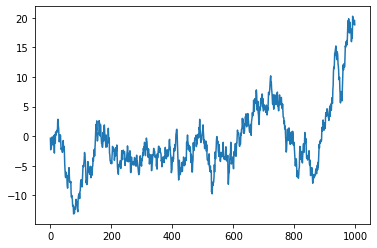

In [23]:
fig

To  change  the  x-axis  ticks,  it’s  easiest  to  use  set_xticks  and  set_xticklabels.

In [24]:
ticks = ax.set_xticks([0, 250, 500, 750, 900])

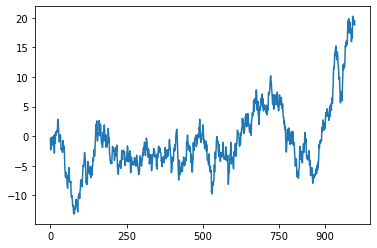

In [25]:
fig

In [33]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=45, fontsize='small')

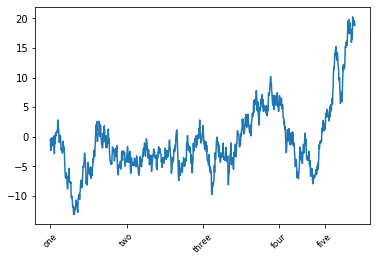

In [34]:
fig

In [35]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1, 'My first matplotlib plot')

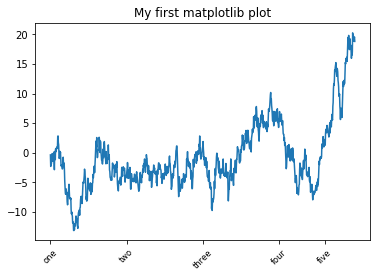

In [36]:
fig

<b>Modifying  the  y-axis  consists  of  the  same  process,  substituting  y  for  x  in  the  above.

In [38]:
props = {'title': 'My revised matplotlib plot','ylabel': 'frequency'}

ax.set(**props)

[Text(3.200000000000003, 0.5, 'frequency'),
 Text(0.5, 1, 'My revised matplotlib plot')]

<b> This works same as before

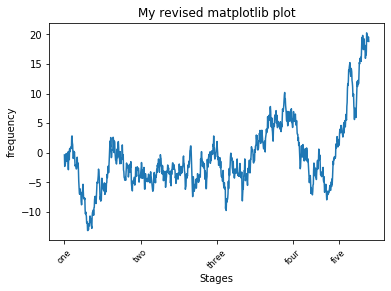

In [39]:
fig

<b>Adding legends

The easiest is to pass the label argument when adding each pieceof the plot.


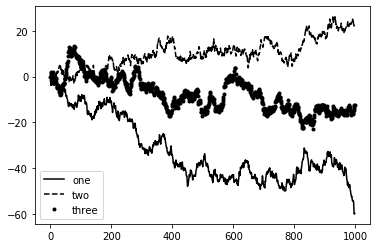

In [42]:
from numpy.random import randn 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')          
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

To exclude one or moreelements from the legend, pass no label or label='_nolegend_'


<h3>Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annota‐tions,  which  could  consist  of  text,  arrows,  or  other  shapes.  You  can  add  annotations and  text  using  the  text,  arrow,  and  annotate  functions.  text  draws  text  at  givencoordinates (x, y) on the plot with optional custom styling:

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

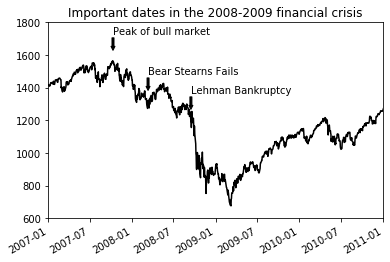

In [54]:
from datetime import datetime 
import pandas as pd
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv(r'D:\spx.csv', index_col=0, parse_dates=True)

spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [    (datetime(2007, 10, 11), 'Peak of bull market'),    
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),    
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:    
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', 
                headwidth=4, width=2,headlength=4),
                horizontalalignment='left', 
                verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

There  are  a  couple  of  important  points  to  highlight  in  this  plot:  

the  ax.annotate method  can  draw  labels  at  the  indicated  x  and  y  coordinates.  We  use  the  set_xlimand  set_ylim  methods  to  manually  set  the  start  and  end  boundaries  for  the  plotrather  than  using  matplotlib’s  default.  Lastly,  ax.set_title  adds  a  main  title  to  theplot.

<b>Drawing Shapes

matplotlib has objects that represent manycommon shapes, referred to as patches. 

Some of these, like Rectangle and Circle, arefound in matplotlib.pyplot, but the full set is located in matplotlib.patches.

To  add  a  shape  to  a  plot,  you  create  the  patch  object  shp  and  add  it  to  a  subplot  bycalling ax.add_patch(shp)

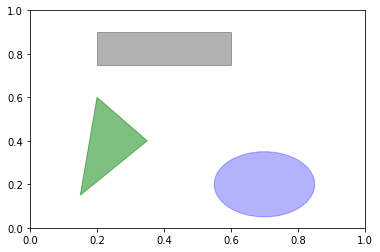

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

You can save the active figure to file using plt.savefig.

Used  frequently  forpublishing    graphics: 

dpi,    which    controls    the    dots-per-inch    resolution

bbox_inches,  which  can  trim  the  whitespace  around  the  actual  figure.  

In [60]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

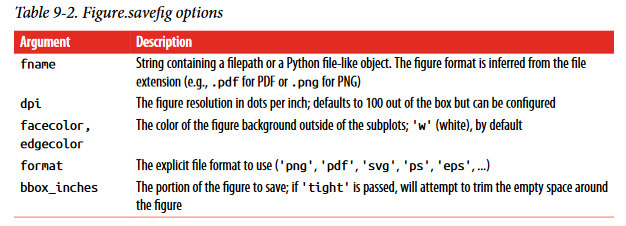

One way to modify the configuration programmatically from Python is to use the rc method;toset the global default figure size to be 10 × 10, you could enter:

plt.rc('figure', figsize=(10, 10))

The first argument to rc is the component you wish to customize, such as 'figure','axes', 'xtick', 'ytick', 'grid', 'legend', or many others. 

After that can follow asequence of keyword arguments indicating the new parameters. An easy way to writedown the options in your program is as a dict:

font_options = {'family' : 'monospace','weight' : 'bold','size'   : 'small'}

plt.rc('font', **font_options)

For more extensive customization and to see a list of all the options, matplotlib comes with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If you cus‐tomize  this  file  and  place  it  in  your  home  directory  titled  .matplotlibrc,  it  will  be loaded each time you use matplotlib.